In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


In [2]:
BHname = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
          'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("/kaggle/input/boston-house-prices/housing.csv", delim_whitespace=True, names = BHname)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


/tmp/ipykernel_18/3592501331.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("/kaggle/input/boston-house-prices/housing.csv", delim_whitespace=True, names = BHname)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
summary = df.describe()
summary = summary.transpose()
print(summary)

         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scalar = MinMaxScaler()
print(scalar.fit(df))
DataScaled = scalar.fit_transform(df)
DataScaled = pd.DataFrame(DataScaled, columns= BHname)

summary = DataScaled.describe()
summary = summary.transpose()
print(summary)

MinMaxScaler()
         count      mean       std  min       25%       50%       75%  max
CRIM     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
ZN       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
INDUS    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
CHAS     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
NOX      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
RM       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
AGE      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
DIS      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
RAD      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
TAX      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
PTRATIO  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
B        506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
LSTAT    5

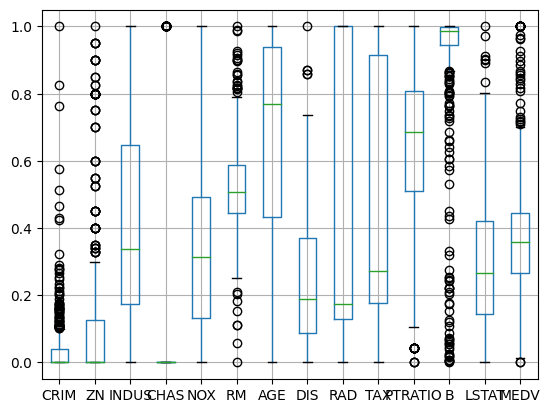

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [7]:
import matplotlib.pyplot as plt
boxplot = DataScaled.boxplot(column= BHname)
plt.show()

cordata = DataScaled.corr(method="pearson")
with pd.option_context("display.max_rows", None, "display.max_column", cordata.shape[1]):
  print(cordata)

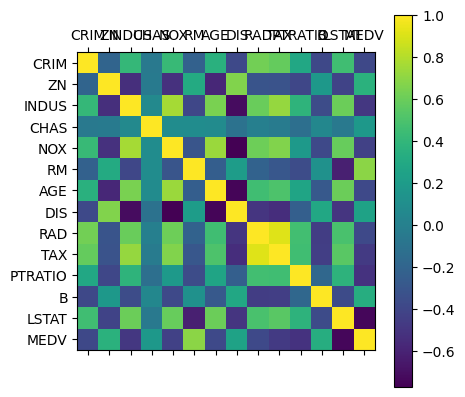

In [8]:
plt.matshow(cordata)
plt.xticks(range(len(cordata.columns)), cordata.columns)
plt.yticks(range(len(cordata.columns)), cordata.columns)
plt.colorbar()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X = DataScaled.drop('MEDV', axis = 1)
print("X Shape= ", X.shape)
Y = DataScaled['MEDV']
print('Y shape= ', Y.shape)

X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size= 0.30, random_state=5)
print("X train Shape", X_train.shape)
print("X test Shape", X_test.shape)
print("Y train Shape", Y_train.shape)
print("Y test Shape", Y_test.shape)

X Shape=  (506, 13)
Y shape=  (506,)
X train Shape (354, 13)
X test Shape (152, 13)
Y train Shape (354,)
Y test Shape (152,)


In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

2024-03-14 17:55:21.494895: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-14 17:55:21.495042: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-14 17:55:21.641918: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
from keras.optimizers import Optimizer
model = Sequential()
# first input and first Hidden Layer
model.add(Dense(20, input_dim=13, activation='relu'))
# Second Hidden Layer
model.add(Dense(10, activation='relu'))
# Output Layer
model.add(Dense(1, activation='linear'))
# Compile ANN
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Fit & display summary
model.fit(X_train, Y_train, epochs=50, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0024 - loss: 0.1321    
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0036 - loss: 0.0680     
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0060 - loss: 0.0369     
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0027 - loss: 0.0370     
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0049 - loss: 0.0303     
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0108 - loss: 0.0280 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0059 - loss: 0.0280     
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0118 - loss: 0.0250     
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0057 - loss: 0.0224     
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0156 - loss: 0.0257 
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0178 - loss: 0.0231 
Epoch 12/50
12/12 ━━━━━━━━━━━━━━

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,004 (3.93 KB)

In [14]:
# testing the test dataset
Y_predKM = model.predict(X_test)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score[0])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0.013032679446041584


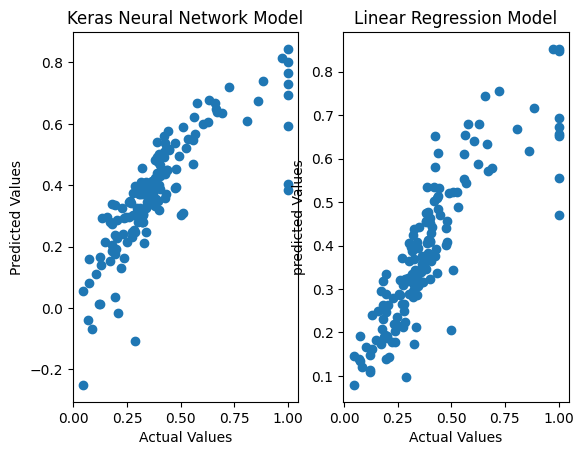

Linear Regression Model mse
0.015159030964982022


In [15]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
LModel = LinearRegression()
LModel.fit(X_train, Y_train)

Y_predLM = LModel.predict(X_test)

plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test, Y_predLM)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Keras Neural Network Model")

plt.subplot(122)
plt.scatter(Y_test, Y_predKM)
plt.xlabel("Actual Values")
plt.ylabel("predicted Values")
plt.title("Linear Regression Model")
plt.show()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_predLM)
print("Linear Regression Model mse")
print(mse)